<a href="https://colab.research.google.com/github/priyanka742/machine_learning/blob/main/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.00%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


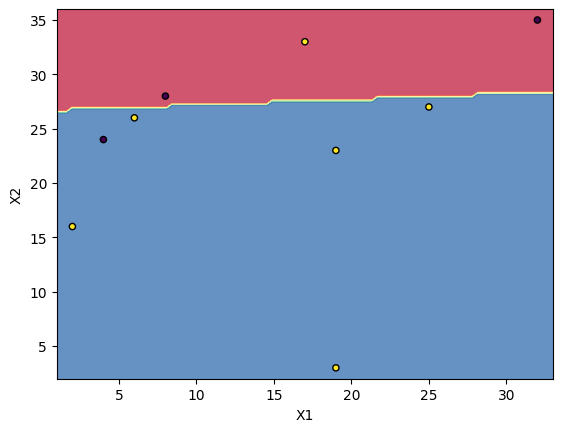

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.inspection import DecisionBoundaryDisplay

# Read the data from an Excel sheet
data = pd.read_excel('/content/new2.xlsx')

# Split the data into features (X) and labels (y)
X = data[['X1', 'X2']]
y = data['Label_column']  # Replace 'Label_column' with the actual name of your label column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier (you can choose the kernel and other hyperparameters)
clf = SVC(kernel='linear')

# Train the SVM classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Plot Decision Boundary
DecisionBoundaryDisplay.from_estimator(
    clf,
    X.values,
    response_method="predict",
    cmap=plt.cm.Spectral,
    alpha=0.8,
    xlabel='X1',
    ylabel='X2',
)

# Scatter plot
plt.scatter(X['X1'], X['X2'], c=y, s=20, edgecolors="k")
plt.show()

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  # Import pandas to read Excel data
from sklearn import svm

# Read data from an existing Excel sheet
excel_file = 'your_excel_file.xlsx'  # Replace with your Excel file path
df = pd.read_excel(excel_file)

# Assuming your Excel sheet has two columns 'Feature1' and 'Feature2' for the input features and a 'Label' column for the target variable
X = df[['Feature1', 'Feature2']].values
y = df['Label'].values

# Create an SVM classifier with a linear kernel
clf = svm.SVC(kernel='linear')

# Fit the classifier on the data
clf.fit(X, y)

# Get the support vectors and plot them
support_vectors = clf.support_vectors_
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create a grid to evaluate the classifier
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and margins
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.title('SVM Decision Boundary')
plt.show()
